In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing dependencies

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os


### directory pathing

In [8]:
base_dir = '/content/drive/My Drive/test_data'
cats_dir = os.path.join(base_dir, 'cats')
dogs_dir = os.path.join(base_dir, 'dogs')



### data preprocessing

In [9]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training')  # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')  # set as validation data



Found 198 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


### building model

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#compiling
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


### Training model

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/30
9/9 [==============================] - 61s 6s/step - loss: 0.7106 - accuracy: 0.5281 - val_loss: 0.6907 - val_accuracy: 0.4750
Epoch 2/30
9/9 [==============================] - 8s 930ms/step - loss: 0.6922 - accuracy: 0.5674 - val_loss: 0.6859 - val_accuracy: 0.5500
Epoch 3/30
9/9 [==============================] - 6s 629ms/step - loss: 0.6820 - accuracy: 0.6180 - val_loss: 0.6847 - val_accuracy: 0.5500
Epoch 4/30
9/9 [==============================] - 8s 929ms/step - loss: 0.6446 - accuracy: 0.5778 - val_loss: 0.6993 - val_accuracy: 0.6000
Epoch 5/30
9/9 [==============================] - 6s 753ms/step - loss: 0.5892 - accuracy: 0.6629 - val_loss: 0.6789 - val_accuracy: 0.5250
Epoch 6/30
9/9 [==============================] - 7s 848ms/step - loss: 0.5912 - accuracy: 0.6629 - val_loss: 0.9016 - val_accuracy: 0.5500
Epoch 7/30
9/9 [==============================] - 6s 652ms/step - loss: 0.5553 - accuracy: 0.7191 - val_loss: 0.7297 - val_accuracy: 0.6750
Epoch 8/30
9/9 [======

### ***Evaluation***

In [5]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


NameError: name 'model' is not defined

### plot

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
# Get the true labels and the predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Assuming binary classification (cats vs. dogs)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

NameError: name 'model' is not defined

### Saving model

---



---



In [ ]:
model.save('/content/drive/My Drive/cats_and_dogs_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Tesing model on a image

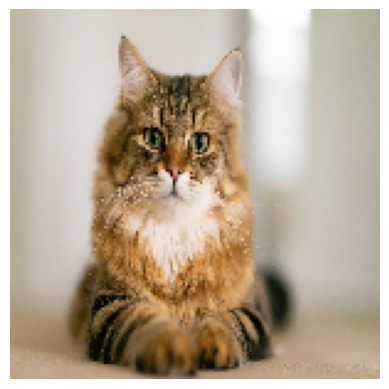

1/1 [==============================] - 1s 688ms/step
It's a cat!


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('/content/drive/My Drive/cats_and_dogs_classifier.h5')

# Path to your test image
img_path = '/content/drive/My Drive/test_image.jpg'

# Load the image
img = image.load_img(img_path, target_size=(150, 150))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input shape (1, 150, 150, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array /= 255.0

# Predict the class
prediction = model.predict(img_array)

# Since we used 'sigmoid' activation, the prediction will be a value between 0 and 1
# We can set a threshold of 0.5 to decide the class
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")
